# **Titanic Survival Prediction**

In [ ]:
## Importing dataset
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

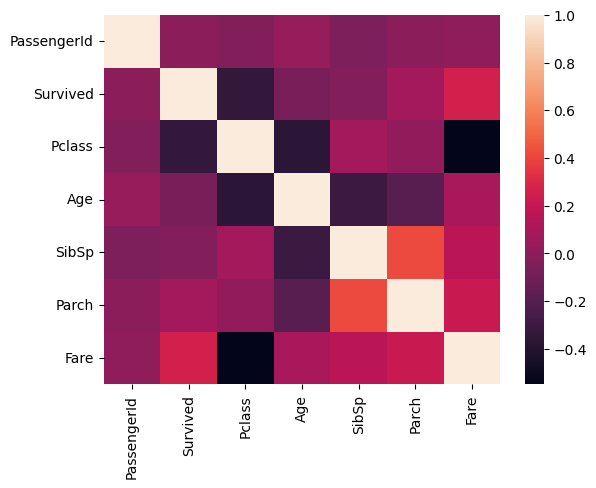

In [ ]:
## Correlation among numerical columns
import seaborn as sns

num_features = [i for i in df.columns if df[i].dtype!='object']
num_df = df[num_features]
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot_kws=corr_matrix.values)

### Check for Null Values

In [ ]:
## Checking for Null values
print("Count of Null Values:")
print(df.isnull().sum())

print("----------------------------")
print("Percentage of Null Values:")
df.isnull().mean()*100 ## percentage of null values

Count of Null Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------
Percentage of Null Values:


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Note: Since dataset would be collected after happening of the Titanic incident, Age and Cabin column seem to be related with each other and can be MNAR(Missing Not at Random). On the other hand, "Embarked" column seems to be MCAR(Missing Completely at Random)

Now let us fix the Age column first

In [ ]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,28.0


<Axes: ylabel='Density'>

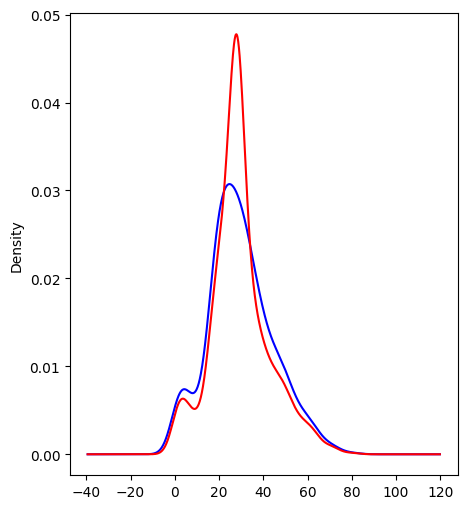

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_median'].plot(kind='kde', ax=ax, color='red')

Observation: As due to median imputation, there's major change in distribution of Age column. Thus, it's not suitable to use median imputation

In [ ]:
df.drop(columns=['Age_median'],axis=1, inplace=True)

In [ ]:
## Binning the Age feature
age_bins = [0,12,18,35,60,np.inf]
age_labels = ["Child","Teenager","Young Adult","Adult","Senior Citizen"]

df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S,Teenager
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S,Young Adult
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S,Young Adult


In [ ]:
## Creating a column to indicate the model where null values existed
df['Age_is_null'] = np.where(df['Age'].isnull(),1,0)
## replacing null vlaues in Age_group feature with a 'missing_age' category
df['Age_group'] = np.where(df['Age_group'].isnull(),"Missing_Age", df['Age_group'])
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Age_is_null
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Senior Citizen,0
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S,Young Adult,0
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Young Adult,0


In [ ]:
df['Age_group'].isnull().sum()
## as we can see, Null values have been removed

0

In [ ]:
### removing Age column, as not needed anymore
df.drop(columns=['Age'], axis=1, inplace=True)

Now let us try to treat the null vlaues in Cabin Column

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Observation: As we can see, Cabin is a categorical feature and there are too many categories. So, firstly, we'll replace null values with 'Missing' label/category. And then, only have 1st letter as  representation of category in the column

In [ ]:
## replacing null vlaues with 'Missing' category
df['Cabin_new'] = np.where(df['Cabin'].isnull(),"Missing",df['Cabin'])
## replacing categories with only 1st letter of the Category, reducing the no. of unique categories
df['Cabin_new'] = df['Cabin_new'].str[0]
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Age_is_null,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Adult,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Young Adult,0,C


In [ ]:
df['Cabin_new'].unique()
### As we can see, no. of categories has reduced drastically

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
### dropping Cabin column, as not needed anymore
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [ ]:
df['Cabin_new'].isnull().sum()

0

Now let us treat the missing values of Embarked column, which is MCAR. We'll replace its null values with its mode. Also, it's not worth to create the column representing where its null vlaues existed, because the percentage of null values is very very small

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked_new'] = np.where(df['Embarked'].isnull(), df['Embarked'].mode()[0], df['Embarked'])

df['Embarked_new'].isnull().sum()

0

In [ ]:
## dropping Embarked column, as no more needed
df.drop(columns=['Embarked'], inplace=True)

In [ ]:
### dropping PassengerID, Name, Ticket columns as not needed
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Fare            0
Age_group       0
Age_is_null     0
Cabin_new       0
Embarked_new    0
dtype: int64

In [ ]:
# Checking Balancedness of dataset
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Feature Engineering

In [ ]:
## Adding SibSp(No. of Siblings aboard) and Parch(no. of parents/children aboard), we get Family Size column
df['Family_Size'] = df['SibSp']+df['Parch']

In [ ]:
## drooping SibSp and Parch columns
df.drop(columns=['SibSp','Parch'], axis=1, inplace=True)

In [ ]:
df.sample(2)

,Survived,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size
245,0,1,male,90.0000,Adult,0,C,Q,2
410,0,3,male,7.8958,Missing_Age,1,M,S,0


Note: Family Size=0 means the person is travelling alone

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'], axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Outleir Detection and Treatment

<Axes: >

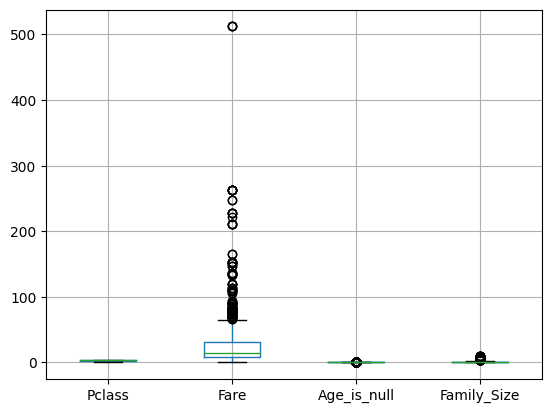

In [ ]:
## Checking Outliers
num_features = [i for i in X_train.columns if df[i].dtype!='object']
df[num_features].boxplot()

Observation: Fare, Age_is_null, Age_missing, and Family_Size columns have outleirs

In [ ]:
print(df['Family_Size'].unique())
print(df['Age_is_null'].unique())
print(df['Family_Size'].unique())

[ 1  0  4  2  6  5  3  7 10]
[0 1]
[ 1  0  4  2  6  5  3  7 10]


Observation: Age_is_null and Age_column is binary column i.e, it has only 0 or 1 as values. So, we won't consider this column as a column with outliers

In [ ]:
def feature_distribution(df, feature):
  import scipy.stats as stats
  import pylab

  plt.figure()
  plt.subplot(111)
  sns.histplot(df[feature], bins=50)
  plt.subplot(112)
  stats.probplot(df[feature], dist='norm', plot=pylab)

Observation: both the columns(which have outliers) have non-gaussian distribution, more specifically, rightly-skewed distribution. So, to remove their outleirs, we'll use IQR Method

In [ ]:
## Computing Upper boundary and lower boundary for all columns as per IQR Method

## defining function for computing upper and lower boundary using IQR
def compute_upper_lower_boundary_iqr_method(data, feature_list):
  for i in feature_list:
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    upper_boundary = data[i].quantile(0.75) + (IQR*3)
    lower_boundary = data[i].quantile(0.25) - (IQR*3)
    print(f"{i} ----> lower boundary: {lower_boundary} , upper boundary: {upper_boundary}")


cols = ['Fare','Family_Size'] ## columns with outleirs
compute_upper_lower_boundary_iqr_method(data=X_train, feature_list=cols)


Fare ----> lower boundary: -59.8 , upper boundary: 98.225
Family_Size ----> lower boundary: -3.0 , upper boundary: 4.0


In [ ]:
## Replacing outliers with upper boundary for all the columns with outliers
X_train.loc[X_train['Fare']>=98.225,'Fare'] = 98.225
X_train.loc[X_train['Family_Size']>=4, 'Family_Size'] = 4

In [ ]:
## let us check if outliers have been imputed with upper range or not
print(X_train.loc[X_train['Fare']>=98.225, 'Fare'])
print(X_train.loc[X_train['Family_Size']>=4, 'Family_Size'])
### As we can see, oultiers have been successfully imputed with upper range

118    98.225
716    98.225
390    98.225
377    98.225
305    98.225
742    98.225
380    98.225
660    98.225
708    98.225
544    98.225
332    98.225
581    98.225
334    98.225
779    98.225
537    98.225
393    98.225
730    98.225
88     98.225
318    98.225
268    98.225
307    98.225
195    98.225
341    98.225
557    98.225
856    98.225
737    98.225
679    98.225
297    98.225
550    98.225
325    98.225
609    98.225
438    98.225
689    98.225
373    98.225
258    98.225
505    98.225
698    98.225
27     98.225
498    98.225
763    98.225
337    98.225
269    98.225
700    98.225
435    98.225
Name: Fare, dtype: float64
813    4
542    4
409    4
7      4
742    4
164    4
24     4
436    4
182    4
176    4
678    4
787    4
167    4
567    4
324    4
68     4
88     4
278    4
634    4
261    4
59     4
341    4
50     4
792    4
180    4
638    4
171    4
16     4
480    4
437    4
229    4
374    4
119    4
610    4
147    4
438    4
386    4
863    4
774    4
233   

## Feature Encoding
- In this step, we'll encode the categorical features

In [ ]:
cat_cols = [i for i in X_train.columns if X_train[i].dtype=='object']
cat_cols

['Sex', 'Age_group', 'Cabin_new', 'Embarked_new']

In [ ]:
X_train.head(2)

,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size
331,1,male,28.5,Adult,0,C,S,0
733,2,male,13.0,Young Adult,0,M,S,0


Note: We'll do Ordinal encoding of gender and Age_group columns, and Nominal encoding of Cabin_new and Embarked_new columns, as they don't have any natural order/ranking

In [ ]:
X_train['Age_group'].unique()

array(['Adult', 'Young Adult', 'Child', 'Missing_Age', 'Teenager',
       'Senior Citizen'], dtype=object)

In [ ]:
X_train['Age_group'].value_counts()

Age_group
Young Adult       293
Adult             154
Missing_Age       140
Child              58
Teenager           53
Senior Citizen     14
Name: count, dtype: int64

In [ ]:
# Ordinal Encoding
## ordinal encoding of Sex column
X_train['Sex'] = np.where(X_train['Sex']=="male",1,0)
## ordinal encoding of Age_group column
age_dict = {'Missing_Age':0, 'Child':1, 'Teenager':2, 'Young Adult':3, 'Adult':4, 'Senior Citizen':5}
X_train['Age_group'] = X_train['Age_group'].map(age_dict)

X_train.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size
331,1,1,28.500,4,0,C,S,0
733,2,1,13.000,3,0,M,S,0
382,3,1,7.925,3,0,M,S,0


In [ ]:
# Nominal Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity, sparse=False to get dense array
## Nominal encoding the Cabin_new and Embarked_new columns
encoded = encoder.fit_transform(X_train[['Cabin_new', 'Embarked_new']])
## Get feature names after one-hot encoding
feature_names = list(encoder.get_feature_names_out(['Cabin_new', 'Embarked_new']))
## Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)

encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Cabin_new_T,Embarked_new_Q,Embarked_new_S
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
708,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
709,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
## Concatenate X_train and encoded_df columns
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df], axis=1)

X_train.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Cabin_new_T,Embarked_new_Q,Embarked_new_S
0,1,1,28.500,4,0,C,S,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,13.000,3,0,M,S,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,1,7.925,3,0,M,S,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
## now we can drop Cabin_new and Embarked_new columns
X_train.drop(columns=['Cabin_new','Embarked_new'], axis=1, inplace=True)

X_train.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Cabin_new_T,Embarked_new_Q,Embarked_new_S
0,1,1,28.500,4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,13.000,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,1,7.925,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
### notice that the new columns are of float type, let us convert them to int type
for i in feature_names:
  X_train[i] = X_train[i].astype(int)

X_train.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Cabin_new_T,Embarked_new_Q,Embarked_new_S
0,1,1,28.500,4,0,0,0,1,0,0,0,0,0,0,0,1
1,2,1,13.000,3,0,0,0,0,0,0,0,0,1,0,0,1
2,3,1,7.925,3,0,0,0,0,0,0,0,0,1,0,0,1


## Feature Transformation
- In this step, we'll transform those continous(not discrete) features which have non-gaussian distribution

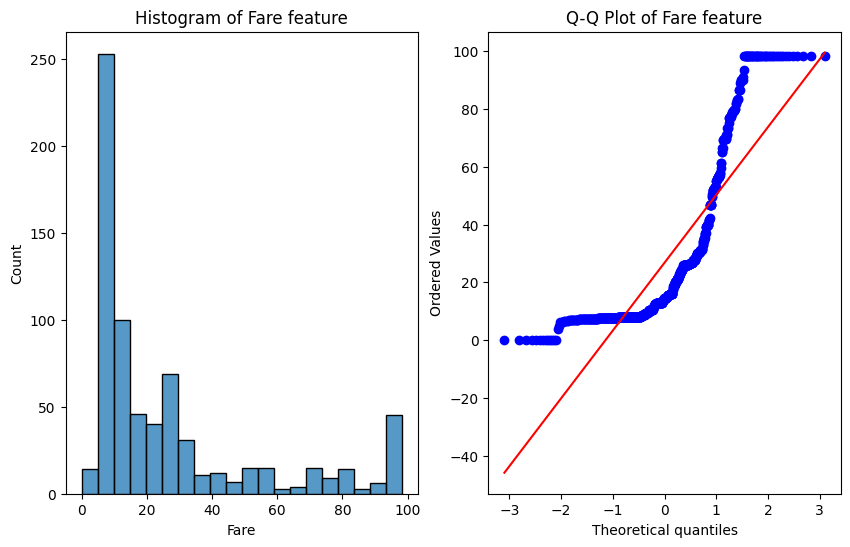

In [ ]:
import scipy.stats as stats
import pylab

def feature_distribution(df, feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(data=df[feature], bins=20)
  plt.title(f"Histogram of {i} feature")
  plt.subplot(1,2,2)
  stats.probplot(x=df[feature], dist='norm', plot=pylab)
  plt.title(f"Q-Q Plot of {i} feature")

continous_features = [i for i in pd.DataFrame(X_train).columns if pd.DataFrame(X_train)[i].nunique()>20]

for i in continous_features:
  feature_distribution(df=X_train, feature=i)

Observation: The fare feature is positively skewed(right skewed). So, it needs to be transformed for having gaussian distribution. Let us test the log transformation,Reciprocal, sqaure root transformation, box-cox transformation, yeo-johnson transformation

In [ ]:
# Logarithmic transformation
X_train_transformations = pd.DataFrame()
X_train_transformations['Fare_log'] = np.log(X_train['Fare'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Reciprocal transformation
X_train_transformations['Fare_reciprocal'] = 1/X_train['Fare']

In [ ]:
# Square Root transformation
X_train_transformations['Fare_sqrt'] = X_train['Fare']**(1/2)

In [ ]:
# Box cox transformation
import scipy.stats as stats
X_train_transformations['Fare_box_cox'], parameters = stats.boxcox(X_train['Fare']+0.0001)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


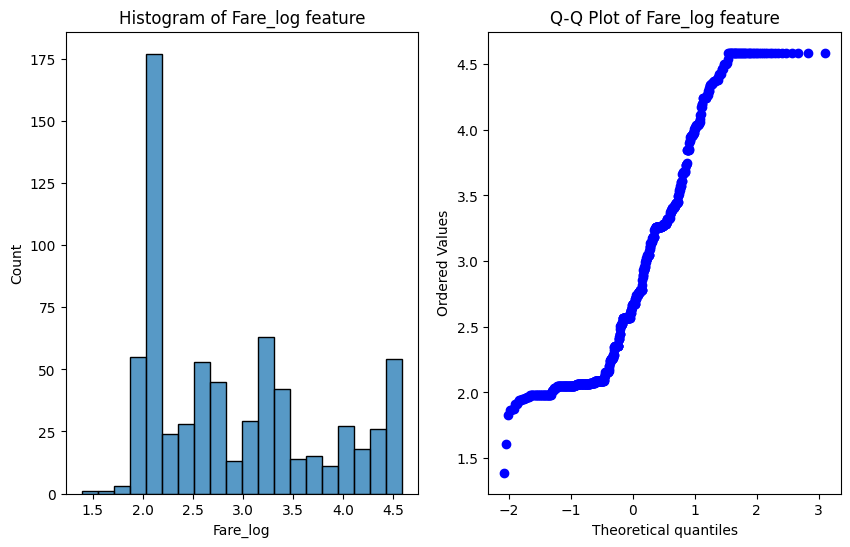

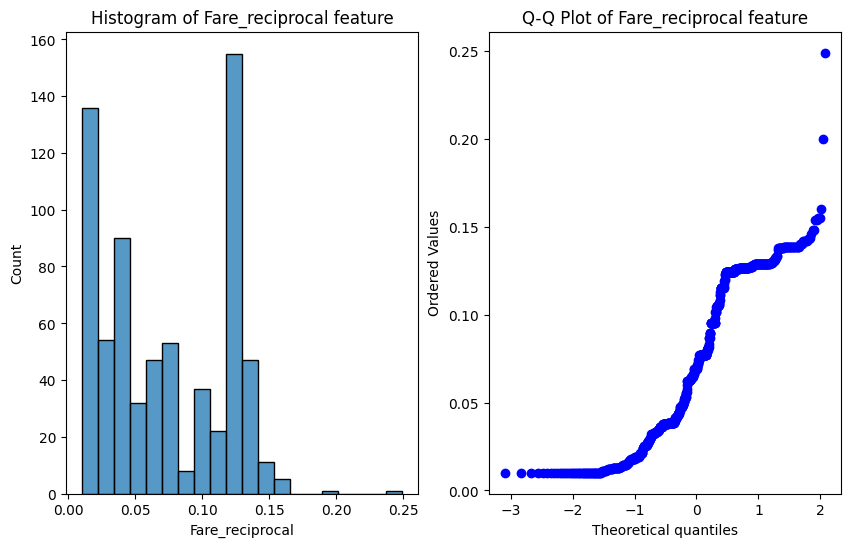

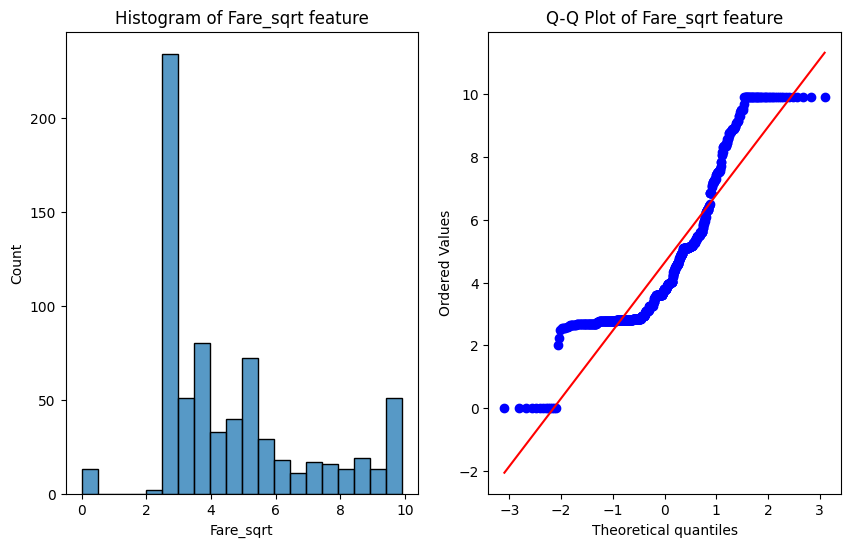

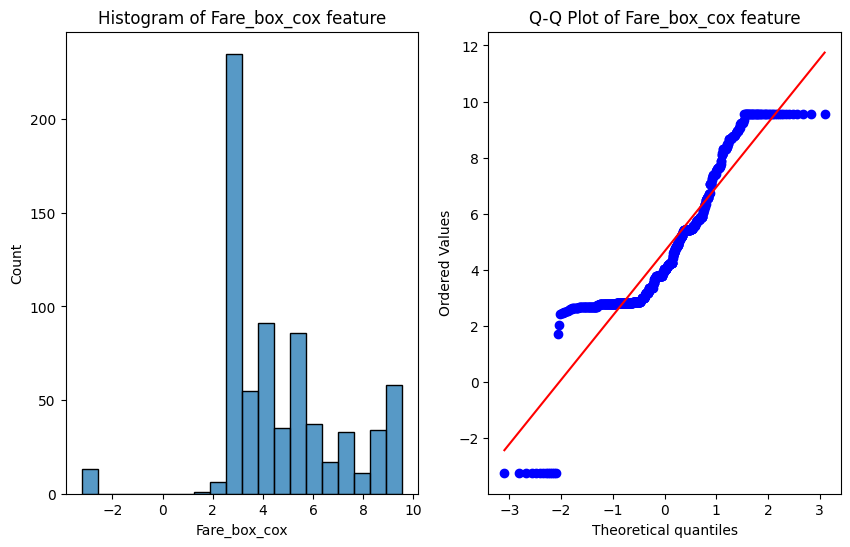

In [ ]:
for i in X_train_transformations.columns:
  feature_distribution(df=X_train_transformations, feature=i)

Observation: It seems that box cox transformation has most gaussian dsitribution

In [ ]:
## Replacing Fare column in X_train with box cox transformed Fare column
X_train['Fare'] = X_train_transformations['Fare_box_cox']


## Feature Scaling
- In this step, we'll perform feature scaling on continous features(i.e, Fare column)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_features = [i for i in pd.DataFrame(X_train).columns if pd.DataFrame(X_train)[i].nunique()>20]
non_continuous_features = [i for i in pd.DataFrame(X_train).columns if pd.DataFrame(X_train)[i].nunique()<=20]

X_train_continuous_scaled = scaler.fit_transform(X_train[continuous_features])
X_train_processed = np.hstack([X_train_continuous_scaled, X_train[non_continuous_features].values])
X_train_scaled = pd.DataFrame(X_train_processed, columns=list(X_train.columns))

X_train_scaled.head(4)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Cabin_new_T,Embarked_new_Q,Embarked_new_S
0,0.405856,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.355617,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.754411,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.761130,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Preprocessing X_test

In [ ]:
# Ordinal Encoding
## ordinal encoding of Sex column
X_test['Sex'] = np.where(X_test['Sex']=="male",1,0)
## ordinal encoding of Age_group column
age_dict = {'Missing_Age':0, 'Child':1, 'Teenager':2, 'Young Adult':3, 'Adult':4, 'Senior Citizen':5}
X_test['Age_group'] = X_test['Age_group'].map(age_dict)

X_test.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size
709,3,1,15.2458,0,1,M,C,2
439,2,1,10.5000,3,0,M,S,0
840,3,1,7.9250,3,0,M,S,0


In [ ]:
# Nominal Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity, sparse=False to get dense array
## Nominal encoding the Cabin_new and Embarked_new columns
encoded = encoder.fit_transform(X_test[['Cabin_new', 'Embarked_new']])
## Get feature names after one-hot encoding
feature_names = list(encoder.get_feature_names_out(['Cabin_new', 'Embarked_new']))
## Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=feature_names)

encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Embarked_new_Q,Embarked_new_S
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
## Concatenate X_train and encoded_df columns
X_test = pd.concat([X_test.reset_index(drop=True), encoded_df], axis=1)

X_test.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Cabin_new,Embarked_new,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Embarked_new_Q,Embarked_new_S
0,3,1,15.2458,0,1,M,C,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1,10.5000,3,0,M,S,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,1,7.9250,3,0,M,S,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
## now we can drop Cabin_new and Embarked_new columns
X_test.drop(columns=['Cabin_new','Embarked_new'], axis=1, inplace=True)

X_test.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Embarked_new_Q,Embarked_new_S
0,3,1,15.2458,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1,10.5000,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,1,7.9250,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
### notice that the new columns are of float type, let us convert them to int type
for i in feature_names:
  X_test[i] = X_test[i].astype(int)

X_test.head(3)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Embarked_new_Q,Embarked_new_S
0,3,1,15.2458,0,1,2,0,0,0,0,0,0,1,0,0
1,2,1,10.5000,3,0,0,0,0,0,0,0,0,1,0,1
2,3,1,7.9250,3,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Box cox transformation
import scipy.stats as stats
X_test_transformations = pd.DataFrame()
X_test_transformations['Fare_box_cox'], parameters = stats.boxcox(X_test['Fare']+0.0001)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_features = [i for i in pd.DataFrame(X_test).columns if pd.DataFrame(X_test)[i].nunique()>20]
non_continuous_features = [i for i in pd.DataFrame(X_test).columns if pd.DataFrame(X_test)[i].nunique()<=20]

X_test_continuous_scaled = scaler.fit_transform(X_test[continuous_features])
X_test_processed = np.hstack([X_test_continuous_scaled, X_test[non_continuous_features].values])
X_test_scaled = pd.DataFrame(X_test_processed, columns=list(X_test.columns))

X_test_scaled.head(4)

,Pclass,Sex,Fare,Age_group,Age_is_null,Family_Size,Cabin_new_B,Cabin_new_C,Cabin_new_D,Cabin_new_E,Cabin_new_F,Cabin_new_G,Cabin_new_M,Embarked_new_Q,Embarked_new_S
0,-0.392468,3.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.513112,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.578571,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.058863,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((712, 16), (179, 15))

Observation: 1 column missing in X_test_scaled

In [ ]:
## finding which column is missing from X_test_scaled
missing_col = [i for i in X_train_scaled.columns if i not in X_test_scaled.columns]
missing_col

['Cabin_new_T']

Observation: Cabin_new_T column is missing from X_test_scaled. So, we'll create a new encoded column in X_test_scaled with name 'Cabin_new_T' column, with all rows having zero values

In [ ]:
X_test_scaled['Cabin_new_T'] = 0

In [ ]:
## Rearrangig columns order
cols_order = list(X_train_scaled.columns)
X_test_scaled = X_test_scaled[cols_order] ## rearranging columns order

### Training and Evaluating Model

In [ ]:
## Create a function to evaluate  model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(true, predicted):
  accuracy = accuracy_score(true, predicted)
  confusion = confusion_matrix(true, predicted)
  classification = classification_report(true, predicted)
  roc_auc= roc_auc_score(true, predicted)
  return accuracy, confusion, classification, roc_auc

In [ ]:
# Training ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Model Training
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear'),
    "XGBoost Classifier": XGBClassifier(),
    "RandomForest Classifier": RandomForestClassifier()
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train_scaled, Y_train)
  ## Make predictions
  Y_train_pred = model.predict(X_train_scaled)
  Y_test_pred = model.predict(X_test_scaled)
  ## Evaluate
  model_train_accuracy, model_train_confusion, model_train_classification, model_train_roc_auc = evaluate_model(Y_train, Y_train_pred)
  model_test_accuracy, model_test_confusion, model_test_classification, model_test_roc_auc = evaluate_model(Y_test, Y_test_pred)

  print(list(models.keys())[i])
  print("MODEL PERFORMANCE FOR TRAINING SET")
  print("Accuracy Score: {:.4f}".format(model_train_accuracy))
  print("Confusion Matrix: {}".format(model_train_confusion))
  print("Classification Report: {}".format(model_train_classification))
  print("Roc Auc Score: {:.4f}".format(model_train_roc_auc))

  print("-------------------------------------------------------------")

  print("MODEL PERFORMANCE FOR TEST SET")
  print("Accuracy Score: {:.4f}".format(model_test_accuracy))
  print("Confusion Matrix: {}".format(model_test_confusion))
  print("Classification Report: {}".format(model_test_classification))
  print("Roc Auc Score: {:.4f}".format(model_test_roc_auc))
  print("-------------------------------------------------------------")
  print("\n")

Logistic Regression
MODEL PERFORMANCE FOR TRAINING SET
Accuracy Score: 0.8006
Confusion Matrix: [[382  62]
 [ 80 188]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84       444
           1       0.75      0.70      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712

Roc Auc Score: 0.7809
-------------------------------------------------------------
MODEL PERFORMANCE FOR TEST SET
Accuracy Score: 0.8045
Confusion Matrix: [[89 16]
 [19 55]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Roc Au

Observation: Logistic Regression and XGBoostClassifier are performing best with respect to test data

## HyperParameter Tuning

In [ ]:
# Hyperparameter Tuning using GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

svc_params = {"C":[0.5,0.8,1.0,1.5,1.8,2.0,2.5],
              "kernel":['linear','poly','rbf','sigmoid'],
              "degree": [1,2,3,4,5,6,7,8,9,10]
              }
rf_params = {"max_depth": [5,8,15,None,10],
             "max_features": [5,7, "auto", 8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200,500,1000]}
xgboost_params = {"learning_rate": [0.1, 0.01, 0.001],
                  "max_depth": [5,8,12,20,30],
                  "n_estimators": [100,200,300,500],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

# Hyperparameter Tuning
gridcv_models = [
    ('Support Vector Classifier', SVC(), svc_params),
    ('XGBoost', XGBClassifier(), xgboost_params),
    ('RF', RandomForestClassifier(), rf_params)
]

model_param = {} ##initiaizing
for name, model, params in gridcv_models:
  random = GridSearchCV(estimator=model, param_grid=params,
                              cv=3, verbose=2, n_jobs=-1)
  random.fit(X_train, Y_train)
  model_param[name] = random.best_params_

  for model_name in model_param:
    print(f"--------------- Best Parameters for {model_name} ---------------")
    print(model_param[model_name])
    print('------------------------------------------------------')

Fitting 3 folds for each of 280 candidates, totalling 840 fits
--------------- Best Parameters for Support Vector Classifier ---------------
{'C': 2.5, 'degree': 1, 'kernel': 'rbf'}
------------------------------------------------------
Fitting 3 folds for each of 300 candidates, totalling 900 fits
--------------- Best Parameters for Support Vector Classifier ---------------
{'C': 2.5, 'degree': 1, 'kernel': 'rbf'}
------------------------------------------------------
--------------- Best Parameters for XGBoost ---------------
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
------------------------------------------------------
Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


--------------- Best Parameters for Support Vector Classifier ---------------
{'C': 2.5, 'degree': 1, 'kernel': 'rbf'}
------------------------------------------------------
--------------- Best Parameters for XGBoost ---------------
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
------------------------------------------------------
--------------- Best Parameters for RF ---------------
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 500}
------------------------------------------------------


### Retraining models with best parameters

In [ ]:
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Model Training
models = {
    "Support Vector Machine": SVC(kernel='rbf', degree=1, C=2.5),
    "XGBoost Classifier": XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500),
    "RandomForest Classifier": RandomForestClassifier(max_depth=10, max_features='auto',min_samples_split=8, n_estimators=500)
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train_scaled, Y_train)
  ## Make predictions
  Y_train_pred = model.predict(X_train_scaled)
  Y_test_pred = model.predict(X_test_scaled)
  ## Evaluate
  model_train_accuracy, model_train_confusion, model_train_classification, model_train_roc_auc = evaluate_model(Y_train, Y_train_pred)
  model_test_accuracy, model_test_confusion, model_test_classification, model_test_roc_auc = evaluate_model(Y_test, Y_test_pred)

  print(list(models.keys())[i])
  print("MODEL PERFORMANCE FOR TRAINING SET")
  print("Accuracy Score: {:.4f}".format(model_train_accuracy))
  print("Confusion Matrix: {}".format(model_train_confusion))
  print("Classification Report: {}".format(model_train_classification))
  print("Roc Auc Score: {:.4f}".format(model_train_roc_auc))

  print("-------------------------------------------------------------")

  print("MODEL PERFORMANCE FOR TEST SET")
  print("Accuracy Score: {:.4f}".format(model_test_accuracy))
  print("Confusion Matrix: {}".format(model_test_confusion))
  print("Classification Report: {}".format(model_test_classification))
  print("Roc Auc Score: {:.4f}".format(model_test_roc_auc))
  print("-------------------------------------------------------------")
  print("\n")

Support Vector Machine
MODEL PERFORMANCE FOR TRAINING SET
Accuracy Score: 0.8301
Confusion Matrix: [[401  43]
 [ 78 190]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87       444
           1       0.82      0.71      0.76       268

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.81       712
weighted avg       0.83      0.83      0.83       712

Roc Auc Score: 0.8061
-------------------------------------------------------------
MODEL PERFORMANCE FOR TEST SET
Accuracy Score: 0.8101
Confusion Matrix: [[92 13]
 [21 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Roc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForest Classifier
MODEL PERFORMANCE FOR TRAINING SET
Accuracy Score: 0.8989
Confusion Matrix: [[429  15]
 [ 57 211]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       444
           1       0.93      0.79      0.85       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712

Roc Auc Score: 0.8768
-------------------------------------------------------------
MODEL PERFORMANCE FOR TEST SET
Accuracy Score: 0.8212
Confusion Matrix: [[92 13]
 [19 55]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Ro